In [1]:
#--------Basic Imports---------

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

%matplotlib inline
import sklearn 
import plotly
import plotly.offline as offline
import plotly.graph_objs as go
import plotly.express as px
plotly.offline.init_notebook_mode(connected=True)

# Data Modelling 

import warnings
warnings.filterwarnings('ignore')

# <font color =red>Load this file to see live visualization which i used below</font>

In [2]:
df=pd.read_csv('train_indessa.csv')
df1=df.iloc[0:5000,:]

In [3]:
df1.to_csv('train_indessa_EDA.csv')

In [4]:

#import all neccesary libraries 


In [5]:
"""lets create a random color generator
     which we can use inside our visualization"""
     
def random_colours(number_of_colors):
   
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# EDA

In [6]:
df=pd.read_csv("train_indessa_EDA.csv")
pd.pandas.set_option('display.max_columns',None)

In [7]:
df.shape

(5000, 46)

In [8]:
df.describe()

Unnamed: 0     member_id     loan_amnt   funded_amnt  funded_amnt_inv  \
count  5000.000000  5.000000e+03   5000.000000   5000.000000      5000.000000   
mean   2499.500000  3.541623e+07  14832.435000  14824.410000     14798.407665   
std    1443.520003  2.403693e+07   8390.953847   8387.566045      8388.802896   
min       0.000000  2.537150e+05   1000.000000   1000.000000       250.590000   
25%    1249.750000  1.157466e+07   8218.750000   8193.750000      8087.500000   
50%    2499.500000  3.853383e+07  13500.000000  13487.500000     13362.500000   
75%    3749.250000  5.846980e+07  20000.000000  20000.000000     20000.000000   
max    4999.000000  7.350846e+07  35000.000000  35000.000000     35000.000000   

          int_rate    annual_inc          dti  delinq_2yrs  inq_last_6mths  \
count  5000.000000  5.000000e+03  5000.000000  5000.000000     5000.000000   
mean     13.297864  7.521482e+04    18.256684     0.324400        0.707200   
std       4.416754  5.228494e+04     8.227728     0.900293        0.984105   
min       5.320000  8.000000e+03     0.000000     0.000000        0.000000   
25%       9.990000  4.550000e+04    12.077500     0.000000        0.000000   
50%      12.990000  6.500000e+04    17.850000     0.000000        0.000000   
75%      16.240000  9.000000e+04    24.022500     0.000000        1.000000   
max      28.490000  1.050000e+06    39.970000    14.000000        7.000000   

       mths_since_last_delinq  mths_since_last_record     open_acc  \
count              2440.00000              761.000000  5000.000000   
mean                 34.52623               70.416557    11.694200   
std                  22.01433               27.690749     5.356531   
min                   0.00000                0.000000     2.000000   
25%                  16.00000               51.000000     8.000000   
50%                  31.00000               69.000000    11.000000   
75%                  51.00000               92.000000    14.000000   
max                 136.00000              120.000000    42.000000   

           pub_rec      revol_bal   revol_util    total_acc  total_rec_int  \
count  5000.000000    5000.000000  4996.000000  5000.000000    5000.000000   
mean      0.195000   16956.038000    54.714171    25.404200    1779.610538   
std       0.542064   19806.313813    23.641449    11.804825    2106.286496   
min       0.000000       0.000000     0.000000     3.000000       0.000000   
25%       0.000000    6476.500000    37.400000    17.000000     443.280000   
50%       0.000000   12136.500000    55.000000    24.000000    1130.350000   
75%       0.000000   20746.500000    73.000000    32.000000    2260.322500   
max       7.000000  368209.000000   113.500000    94.000000   18246.320000   

       total_rec_late_fee   recoveries  collection_recovery_fee  \
count         5000.000000  5000.000000              5000.000000   
mean             0.317424    39.855118                 3.563324   
std              3.692636   327.715551                43.514242   
min              0.000000     0.000000                 0.000000   
25%              0.000000     0.000000                 0.000000   
50%              0.000000     0.000000                 0.000000   
75%              0.000000     0.000000                 0.000000   
max            139.560000  6211.530000              1115.245800   

       collections_12_mths_ex_med  mths_since_last_major_derog  \
count                 5000.000000                  1260.000000   
mean                     0.014400                    44.699206   
std                      0.125681                    22.355333   
min                      0.000000                     0.000000   
25%                      0.000000                    28.000000   
50%                      0.000000                    45.000000   
75%                      0.000000                    60.000000   
max                      2.000000                   137.000000   

       acc_now_delinq  tot_coll_amt   tot_

In [9]:
df.columns

Index(['Unnamed: 0', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'batch_enrolled', 'int_rate', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

<font color=red> <b> Find columns with low cardinality </font>


In [10]:
low_cardinality_cols=[cname for cname in df.columns if df[cname].nunique()<10 and df[cname].dtype=='object']

In [11]:

low_cardinality_cols

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'initial_list_status',
 'application_type',
 'verification_status_joint']

In [12]:
# Numerical cols

In [13]:
numerical_cols=[cname for cname in df.columns if df[cname].dtype !="O"]

In [14]:
numerical_cols

['Unnamed: 0',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

In [15]:
#find the colums with missing values

In [16]:
cols_with_missing=[col for col in df.columns if df[col].isnull().sum()>1]

In [17]:
cols_with_missing

['batch_enrolled',
 'emp_title',
 'emp_length',
 'desc',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'mths_since_last_major_derog',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim']

In [18]:
# find the categorical columns inside the Dataframe

In [19]:
categorical_cols=[cname for cname in df.columns if df[cname].dtype == "O"]

In [20]:
categorical_cols

['term',
 'batch_enrolled',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'initial_list_status',
 'application_type',
 'verification_status_joint',
 'last_week_pay']

In [21]:
#lets find the unique values in each columns

In [22]:
for col in categorical_cols:
    print(col ,"------> ",df[col].nunique())

term ------>  2
batch_enrolled ------>  85
grade ------>  7
sub_grade ------>  35
emp_title ------>  3332
emp_length ------>  11
home_ownership ------>  4
verification_status ------>  3
pymnt_plan ------>  1
desc ------>  689
purpose ------>  13
title ------>  673
zip_code ------>  721
addr_state ------>  49
initial_list_status ------>  2
application_type ------>  2
verification_status_joint ------>  2
last_week_pay ------>  78


In [23]:
# df.head(2)
# df=df.replace('NaN','-1')


In [24]:
df.head(10)


Unnamed: 0  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0           0   58189336      14350        14350          14350.0  36 months   
1           1   70011223       4800         4800           4800.0  36 months   
2           2   70255675      10000        10000          10000.0  36 months   
3           3    1893936      15000        15000          15000.0  36 months   
4           4    7652106      16000        16000          16000.0  36 months   
5           5   10247268      15000        15000          14950.0  36 months   
6           6    8089625       5000         5000           4975.0  36 months   
7           7   23043116       6000         6000           6000.0  36 months   
8           8   45900933       6000         6000           6000.0  36 months   
9           9   41272507      34550        34550          34550.0  60 months   

  batch_enrolled  int_rate grade sub_grade                          emp_title  \
0                    19.19     E        E3                              clerk   
1     BAT1586599     10.99     B        B4         Human Resources Specialist   
2     BAT1586599      7.26     A        A4                             Driver   
3     BAT4808022     19.72     D        D5  Us office of Personnel Management   
4     BAT2833642     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   
5     BAT2575549      8.90     A        A5                  Design Consultant   
6                     7.90     A        A4          TOYOTA OF NORTH HOLLYWOOD   
7            NaN      9.17     B        B1                             Banker   
8     BAT4136152     13.99     C        C4                                LVN   
9     BAT4694572     17.14     D        D4                   Registered Nurse   

  emp_length home_ownership  annual_inc verification_status pymnt_plan  \
0    9 years            OWN     28700.0     Source Verified          n   
1   < 1 year       MORTGAGE     65000.0     Source Verified          n   
2    2 years            OWN     45000.0        Not Verified          n   
3  10+ years           RENT    105000.0        Not Verified          n   
4  10+ years           RENT     52000.0            Verified          n   
5    2 years       MORTGAGE    120000.0        Not Verified          n   
6    5 years           RENT     75000.0     Source Verified          n   
7    8 years       MORTGAGE     54000.0        Not Verified          n   
8    7 years       MORTGAGE     92000.0        Not Verified          n   
9    2 years       MORTGAGE     72000.0            Verified          n   

                                                desc             purpose  \
0                                                NaN  debt_consolidation   
1                                                NaN    home_improvement   
2                                                NaN  debt_consolidation   
3  > My goal is to obtain a loan to pay off my hi...  debt_consolidation   
4                                                NaN         credit_card   
5     > We are requesting this loan to help re-or...  debt_consolidation   
6  > Funds will be used to pay off a debt. I am a...  debt_consolidation   
7                                                NaN         credit_card   
8                                                NaN    home_improvement   
9                                                NaN  debt_consolidation   

                            title zip_code addr_state    dti  delinq_2yrs  \
0              Debt consolidation    349xx         FL  33.88          0.0   
1                Home improvement    209xx         MD   3.64          0.0   
2              Debt consolidation    447xx         OH  18.42          0.0   
3              Debt consolidation    221xx         VA  14.97          0.0   
4                            refi    900xx         CA  20.16          0.0   
5  Credit Card Debt Consolidation    461xx         IN  12.30          0.0   
6                    PAY THEM OFF    91

In [25]:
df.drop(['batch_enrolled'],axis=1)

Unnamed: 0  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0              0   58189336      14350        14350          14350.0   
1              1   70011223       4800         4800           4800.0   
2              2   70255675      10000        10000          10000.0   
3              3    1893936      15000        15000          15000.0   
4              4    7652106      16000        16000          16000.0   
...          ...        ...        ...          ...              ...   
4995        4995   46418489       7500         7500           7500.0   
4996        4996    1194516      28000        28000          27725.0   
4997        4997   48572128      16000        16000          16000.0   
4998        4998   27649821      10000        10000          10000.0   
4999        4999   68507919      20000        20000          20000.0   

           term  int_rate grade sub_grade                          emp_title  \
0     36 months     19.19     E        E3                              clerk   
1     36 months     10.99     B        B4         Human Resources Specialist   
2     36 months      7.26     A        A4                             Driver   
3     36 months     19.72     D        D5  Us office of Personnel Management   
4     36 months     10.64     B        B2        LAUSD-HOLLYWOOD HIGH SCHOOL   
...         ...       ...   ...       ...                                ...   
4995  36 months     12.69     C        C2           Senior Financial Analyst   
4996  60 months     12.69     B        B5                UCSF Medical Center   
4997  60 months     16.99     D        D3    Senior Web Design & Development   
4998  36 months     13.98     C        C3              public works director   
4999  60 months      8.18     B        B1                             driver   

     emp_length home_ownership  annual_inc verification_status pymnt_plan  \
0       9 years            OWN     28700.0     Source Verified          n   
1      < 1 year       MORTGAGE     65000.0     Source Verified          n   
2       2 years            OWN     45000.0        Not Verified          n   
3     10+ years           RENT    105000.0        Not Verified          n   
4     10+ years           RENT     52000.0            Verified          n   
...         ...            ...         ...                 ...        ...   
4995   < 1 year           RENT     80000.0            Verified          n   
4996    4 years       MORTGAGE    115000.0            Verified          n   
4997    5 years           RENT     70000.0     Source Verified          n   
4998    8 years       MORTGAGE     46000.0     Source Verified          n   
4999  10+ years       MORTGAGE     95000.0        Not Verified          n   

                                                   desc             purpose  \
0                                                   NaN  debt_consolidation   
1                                                   NaN    home_improvement   
2                                                   NaN  debt_consolidation   
3     > My goal is to obtain a loan to pay off my hi...  debt_consolidation   
4                                                   NaN         credit_card   
...                                                 ...                 ...   
4995                                                NaN               other   
4996     > I am requesting this loan for major impro...    home_improvement   
4997                                                NaN  debt_consolidation   
4998                                                NaN  debt_consolidation   
4999                                                NaN  debt_consolidation   

                   title zip_code addr_state    dti  delinq_2yrs  \
0     Debt consolidation    349xx         FL  33.88          0.0   
1       Home improvement    209xx         MD   3.64          0.0   
2     Debt consolidation    447xx         OH  18.42          0.0   
3     Debt consolidation    221xx 

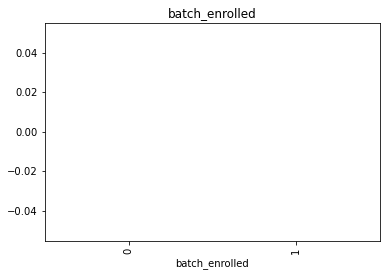

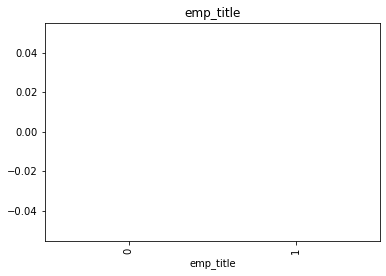

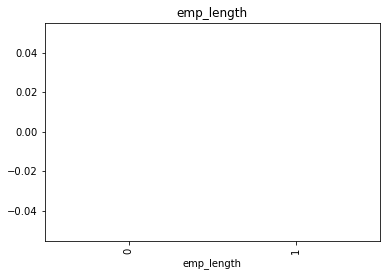

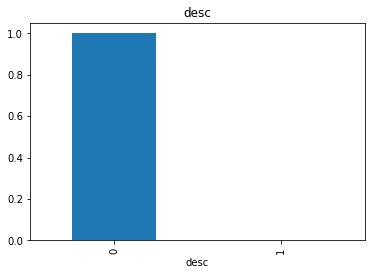

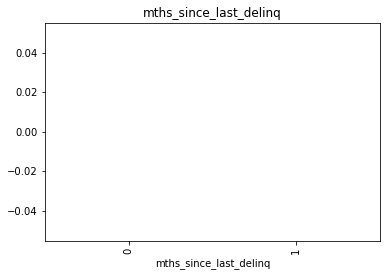

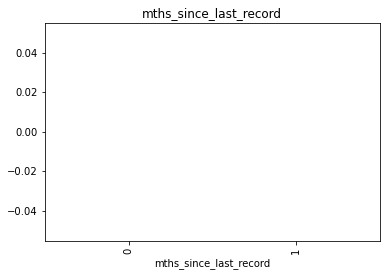

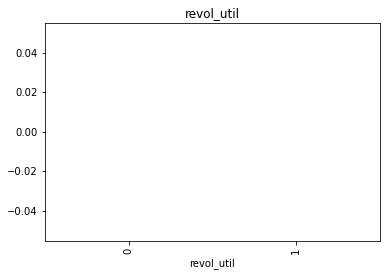

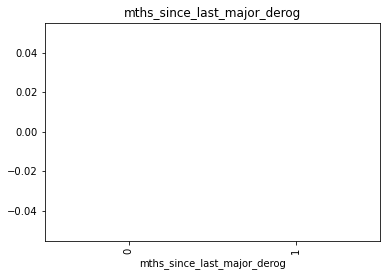

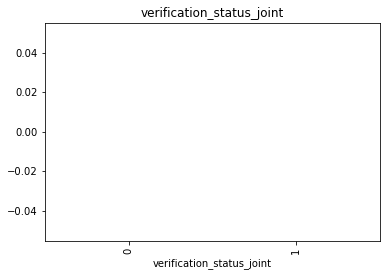

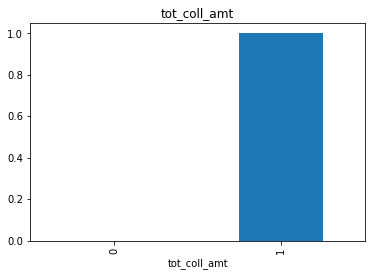

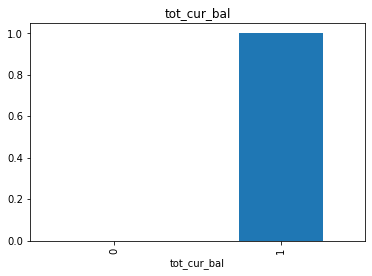

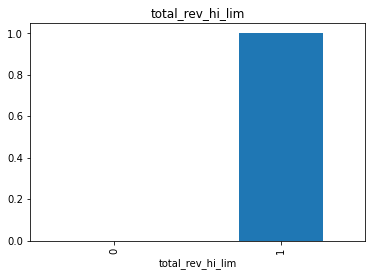

In [26]:
for col in cols_with_missing:
    
    df[col]=np.where(df[col].isnull(),1,0)
    
    df.groupby(col)['loan_status'].median().plot.bar()
    plt.title(col)
    plt.show()
    
  

# Observation : above diagrame shows us that

   
there is no relations between below columns and output variable that is Loan_status

    1 batch enrolled 
    2 emp title 
    3 emp length
    4 title 
    5 months since last record 
    6 revol_util
    7 verifiction status joint
    8 mths_since_last_major_derog
    has Zero relation with output variable"""
    
    
    So we need to replace this nan values with some robust values 

In [27]:
df.head()

Unnamed: 0  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0           0   58189336      14350        14350          14350.0  36 months   
1           1   70011223       4800         4800           4800.0  36 months   
2           2   70255675      10000        10000          10000.0  36 months   
3           3    1893936      15000        15000          15000.0  36 months   
4           4    7652106      16000        16000          16000.0  36 months   

   batch_enrolled  int_rate grade sub_grade  emp_title  emp_length  \
0               0     19.19     E        E3          0           0   
1               0     10.99     B        B4          0           0   
2               0      7.26     A        A4          0           0   
3               0     19.72     D        D5          0           0   
4               0     10.64     B        B2          0           0   

  home_ownership  annual_inc verification_status pymnt_plan  desc  \
0            OWN     28700.0     Source Verified          n     1   
1       MORTGAGE     65000.0     Source Verified          n     1   
2            OWN     45000.0        Not Verified          n     1   
3           RENT    105000.0        Not Verified          n     0   
4           RENT     52000.0            Verified          n     1   

              purpose               title zip_code addr_state    dti  \
0  debt_consolidation  Debt consolidation    349xx         FL  33.88   
1    home_improvement    Home improvement    209xx         MD   3.64   
2  debt_consolidation  Debt consolidation    447xx         OH  18.42   
3  debt_consolidation  Debt consolidation    221xx         VA  14.97   
4         credit_card                refi    900xx         CA  20.16   

   delinq_2yrs  inq_last_6mths  mths_since_last_delinq  \
0          0.0             1.0                       0   
1          0.0             1.0                       1   
2          0.0             0.0                       1   
3          0.0             2.0                       0   
4          0.0             0.0                       1   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                       0      14.0      1.0    22515.0           0   
1                       1       6.0      0.0     7624.0           0   
2                       1       5.0      0.0    10877.0           0   
3                       1      10.0      0.0    13712.0           0   
4                       1      11.0      0.0    35835.0           0   

   total_acc initial_list_status  total_rec_int  total_rec_late_fee  \
0       28.0                   f        1173.84                 0.0   
1       13.0                   w          83.95                 0.0   
2       19.0                   w          56.47                 0.0   
3       21.0                   f        4858.62                 0.0   
4       27.0                   w        2296.41                 0.0   

   recoveries  collection_recovery_fee  collections_12_mths_ex_med  \
0         0.0                      0.0                         0.0   
1         0.0                      0.0                         0.0   
2         0.0                      0.0                         0.0   
3         0.0                      0.0                         0.0   
4         0.0                      0.0                         0.0   

   mths_since_last_major_derog application_type  verification_status_joint  \
0                            0       INDIVIDUAL                          1   
1                            1       INDIVIDUAL                          1   
2                            1       INDIVIDUAL                          1   
3                            1       INDIVIDUAL                          1   
4                            1       INDIVIDUAL                          1   

  last_week_pay  acc_now_delinq  tot_coll_amt  tot_cur_bal  total_rev_hi_lim  \
0     26th week             0.0             0            0                 0   


<AxesSubplot:xlabel='loan_status', ylabel='count'>

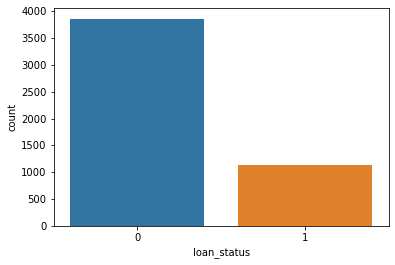

In [28]:
sns.countplot(df['loan_status'])

# Conclusion:-
By above visualization we can see that the data is imbalance 
If we use this data out of 10 prediction we will get approx 70% percent of times The person will not default the Bank
So to avoid this case will downsample the data in feature engineering

In [29]:
df.loan_status.value_counts()

0    3857
1    1143
Name: loan_status, dtype: int64

In [30]:
df.isnull().sum()

Unnamed: 0                     0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          1
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc 

In [31]:
df.corr()

Unnamed: 0  member_id  loan_amnt  funded_amnt  \
Unnamed: 0                     1.000000  -0.010188   0.008247     0.007980   
member_id                     -0.010188   1.000000   0.058427     0.059825   
loan_amnt                      0.008247   0.058427   1.000000     0.999603   
funded_amnt                    0.007980   0.059825   0.999603     1.000000   
funded_amnt_inv                0.007469   0.063177   0.998400     0.998823   
batch_enrolled                 0.004855   0.000074   0.024823     0.023076   
int_rate                      -0.014916  -0.131933   0.141644     0.141684   
emp_title                      0.002590  -0.011157  -0.065830    -0.065609   
emp_length                     0.007503   0.036432  -0.081328    -0.081134   
annual_inc                    -0.010306   0.012101   0.419869     0.419051   
desc                          -0.025520   0.511115   0.027626     0.029352   
dti                           -0.025244   0.136958   0.011152     0.011687   
delinq_2yrs                   -0.002169   0.054502   0.009603     0.008928   
inq_last_6mths                -0.018260  -0.123490  -0.031094    -0.031437   
mths_since_last_delinq         0.011231  -0.079777   0.025715     0.025589   
mths_since_last_record         0.018992  -0.068532   0.101392     0.101028   
open_acc                      -0.024539   0.098005   0.173288     0.173855   
pub_rec                       -0.012438   0.070548  -0.079141    -0.078828   
revol_bal                      0.010033   0.027740   0.368490     0.368313   
revol_util                    -0.014879  -0.031487  -0.033581    -0.033568   
total_acc                     -0.029357   0.036013   0.220130     0.219852   
total_rec_int                  0.013807  -0.462545   0.548109     0.546612   
total_rec_late_fee             0.000778  -0.072524   0.025947     0.026040   
recoveries                    -0.008157  -0.128435   0.064461     0.064597   
collection_recovery_fee        0.003837  -0.088030   0.049979     0.050078   
collections_12_mths_ex_med    -0.012022   0.058479  -0.011976    -0.011871   
mths_since_last_major_derog    0.012978  -0.116239   0.048371     0.047835   
verification_status_joint      0.000554  -0.029307   0.025529     0.025520   
acc_now_delinq                -0.025653   0.017117  -0.011005    -0.010949   
tot_coll_amt                   0.007820  -0.410260  -0.077943    -0.081301   
tot_cur_bal                    0.007820  -0.410260  -0.077943    -0.081301   
total_rev_hi_lim               0.007820  -0.410260  -0.077943    -0.081301   
loan_status                    0.014481  -0.489759  -0.105701    -0.106640   

                             funded_amnt_inv  batch_enrolled  int_rate  \
Unnamed: 0                          0.007469        0.004855 -0.014916   
member_id                           0.063177        0.000074 -0.131933   
loan_amnt                           0.998400        0.024823  0.141644   
funded_amnt                         0.998823        0.023076  0.141684   
funded_amnt_inv                     1.000000        0.021638  0.141509   
batch_enrolled                      0.021638        1.000000 -0.006133   
int_rate                            0.141509       -0.006133  1.000000   
emp_title                          -0.065039       -0.016474 -0.008149   
emp_length                         -0.080623       -0.014370 -0.007446   
annual_inc                          0.418704        0.024943 -0.055527   
desc                                0.034522       -0.011326 -0.014188   
dti                                 0.012762       -0.013574  0.176729   
delinq_2yrs                         0.009214        0.003208  0.047182   
inq_last_6mths                     -0.031971       -0.002559  0.227811   
mths_since_last_delinq              0.025440       -0.006917 -0.072175   
mths_since_last_record              0.101845        0.009554 -0.053280   
open_acc                            0.173842       -0.011125 -0.019685   
pub_rec                            -0.079075

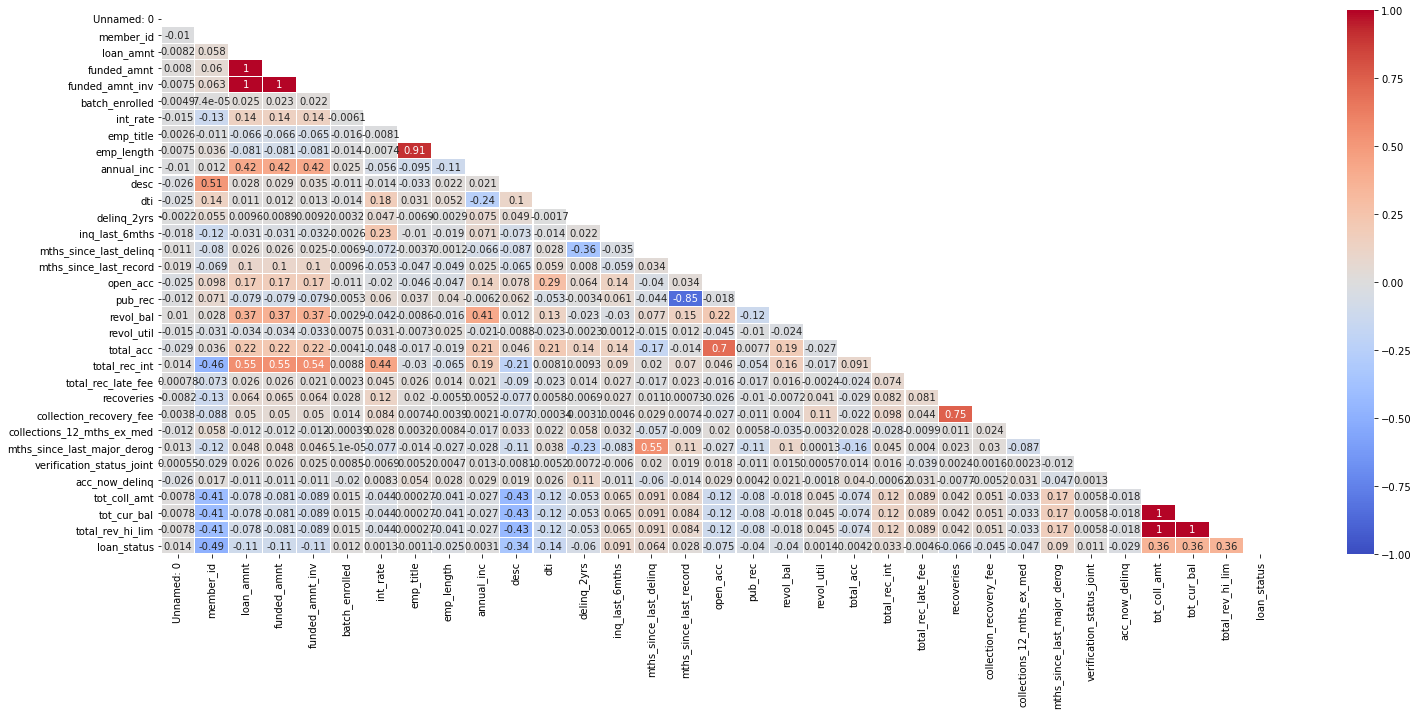

In [32]:
plt.figure(figsize=(25, 10))

corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

ax = sns.heatmap(df.corr(), cmap="YlGnBu")

In [33]:
df['loan_amnt'][:1000]

0      14350
1       4800
2      10000
3      15000
4      16000
       ...  
995    25000
996    24000
997    20000
998     5000
999    10000
Name: loan_amnt, Length: 1000, dtype: int64

# Conclusion:
<font color=red> <b> so what we can conclude from above heatmap there is a huge correlation between total current balance 
acc_now_deling , mnths_since last dealing  and Loan_status</font>







# Loan Default by Loan amount

<AxesSubplot:xlabel='loan_amnt'>

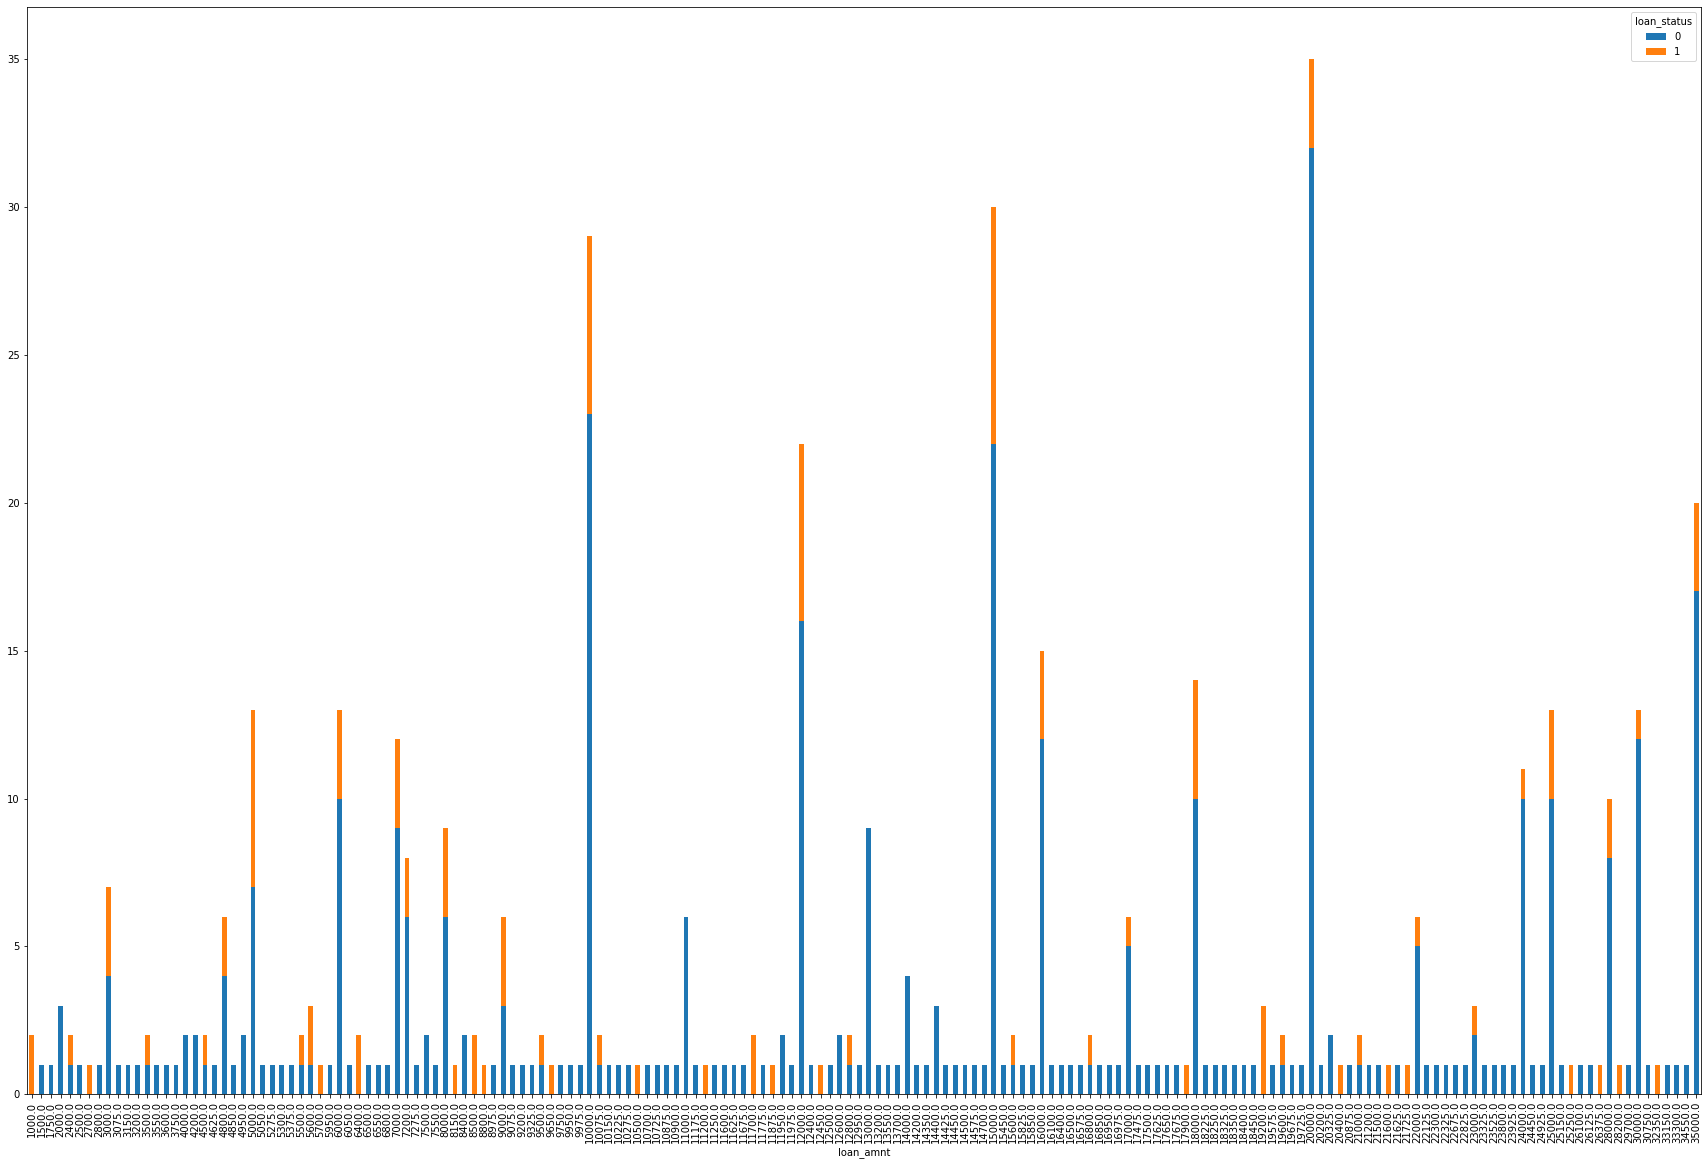

In [34]:
df.groupby([df['loan_amnt'][:500], "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,20)) 

# Conclusion
<font color=red>we can conclude from above figure that people with higher loan_Amount have great chance of loan_Default</font>

# Loan Default By Intrest Rate

<AxesSubplot:xlabel='int_rate'>

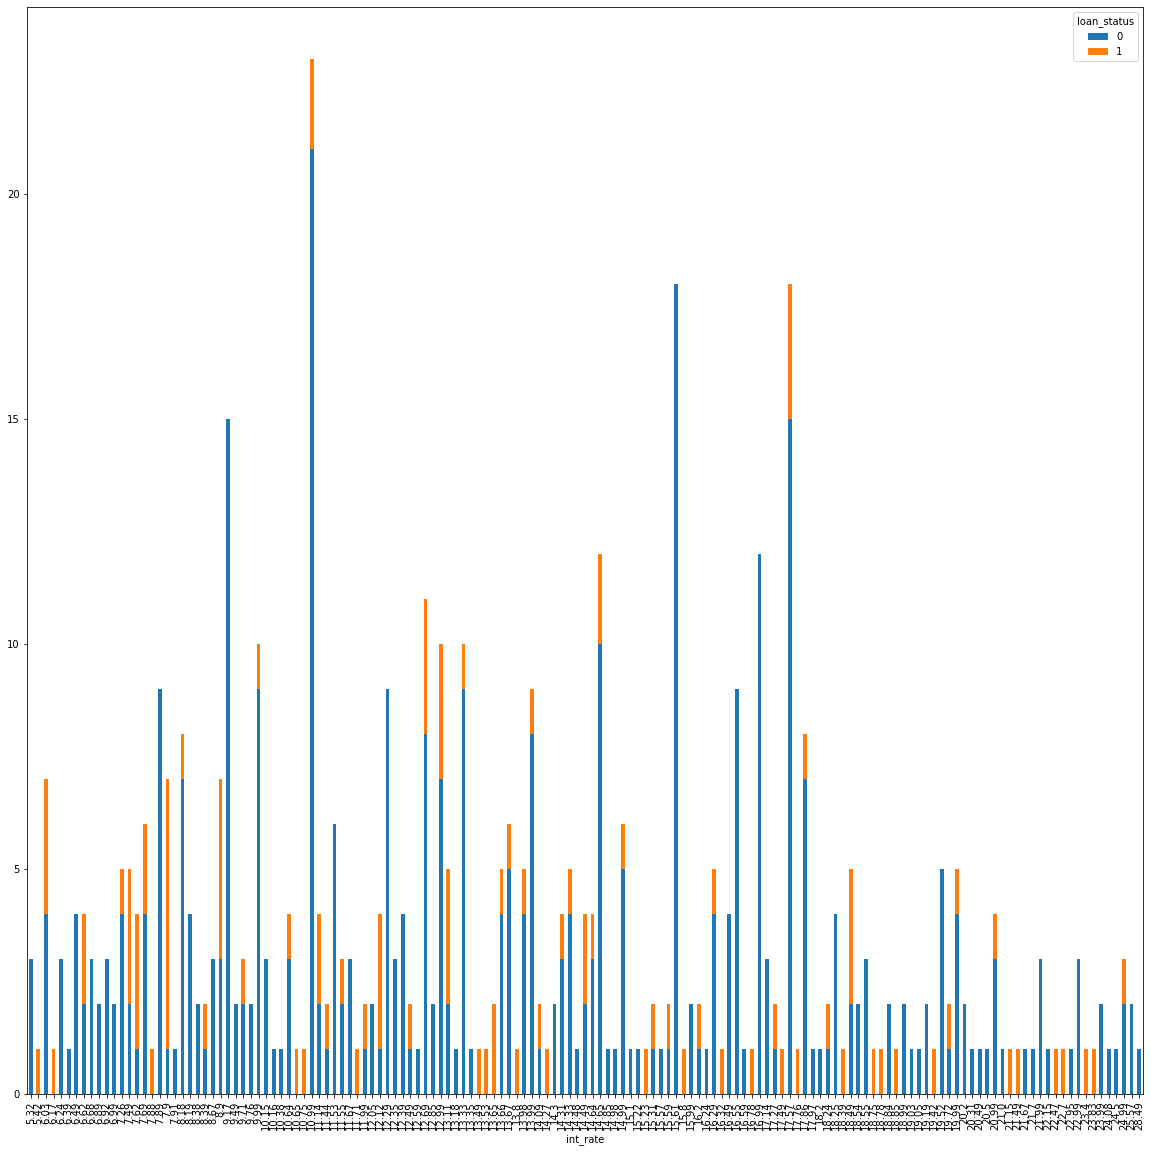

In [35]:
df.groupby([df['int_rate'][:500], "loan_status"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,20))

# Conclusion
there is a positive correlation between higher intrest rate and loan default as intrest rate increase the chances of deafault also increase

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'member_id'}>,
        <AxesSubplot:title={'center':'loan_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt'}>,
        <AxesSubplot:title={'center':'funded_amnt_inv'}>,
        <AxesSubplot:title={'center':'batch_enrolled'}>],
       [<AxesSubplot:title={'center':'int_rate'}>,
        <AxesSubplot:title={'center':'emp_title'}>,
        <AxesSubplot:title={'center':'emp_length'}>,
        <AxesSubplot:title={'center':'annual_inc'}>,
        <AxesSubplot:title={'center':'desc'}>,
        <AxesSubplot:title={'center':'dti'}>],
       [<AxesSubplot:title={'center':'delinq_2yrs'}>,
        <AxesSubplot:title={'center':'inq_last_6mths'}>,
        <AxesSubplot:title={'center':'mths_since_last_delinq'}>,
        <AxesSubplot:title={'center':'mths_since_last_record'}>,
        <AxesSubplot:title={'center':'open_acc'}>,
        <AxesSubplot:title={'center':'pub_rec'}>],
       [<AxesSubplot:title=

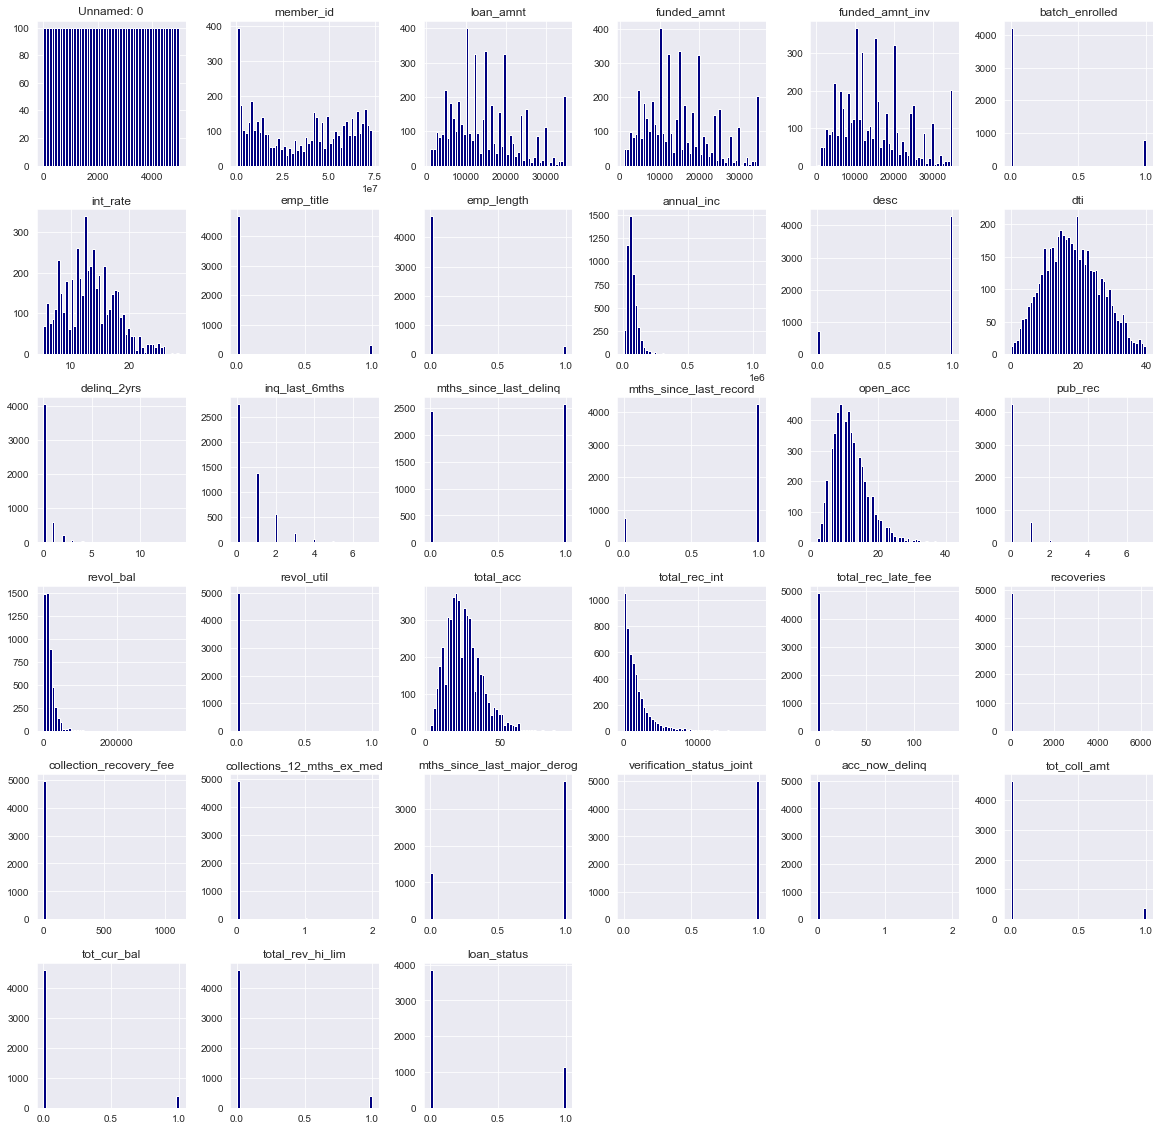

In [36]:
sns.set_style('dark')
df.hist(bins=50,figsize=(20,20),color='navy')

# lets find the correlation between variables with respect to output variable

In [37]:
df[['home_ownership','loan_status']].corr()

loan_status
loan_status          1.0

In [38]:
df[['annual_inc','loan_status']].corr()

annual_inc  loan_status
annual_inc     1.000000     0.003143
loan_status    0.003143     1.000000

In [39]:
df[['int_rate','loan_status']].corr()

int_rate  loan_status
int_rate     1.000000     0.001316
loan_status  0.001316     1.000000

In [40]:
# Total claim amount distribution
fig = px.histogram(df, x="funded_amnt_inv", color="loan_status", marginal="box", # can be 'rug', `box`, `violin`
                         hover_data=df.columns)
fig.show()

# conclusion 
<font color=red> <b>people with higher loan amount and higher funded amount inv have highet chances of deafult</font> 

In [41]:
# distribution of home ownership and loan status 
fig = px.histogram(df, x='home_ownership', color='loan_status', histnorm='probability density')
fig.show()

# <font color= red>people who have mortgage and rent have higher chance of leaving bank </font>

In [42]:
fig = px.pie(df, values=df['term'].value_counts(), names=df['term'].value_counts().keys(), title='Incident Type', )
fig.show()

# Lets find the distribution of some columns

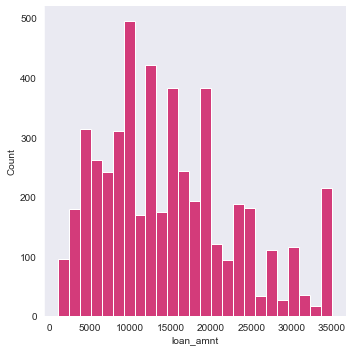

In [43]:
sns.set_style('dark')
ax=sns.displot(df['loan_amnt'],color="#cc0052")

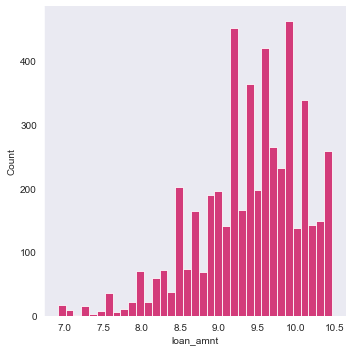

In [44]:
sns.set_style('dark')
ax=sns.displot(np.log1p(df['loan_amnt']),color="#cc0052")

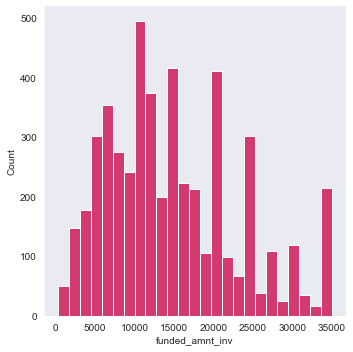

In [45]:
sns.set_style('dark')
ax=sns.displot(df['funded_amnt_inv'],color="#cc0045")

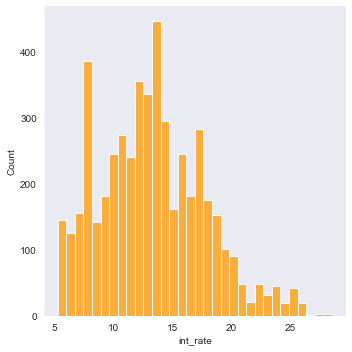

In [46]:
sns.set_style('dark')
ax=sns.displot(df['int_rate'],color="#ff9900")

 #Conclusion:
<font color=red>from above data visualization of colums we can see the distribution of the colunms is normal but there is some variance which is ok but the value varies in large amount so we apply min max scaling</font>

In [47]:
fig = px.treemap(df, path=['purpose'], title='Tree Of Unique Purpose of loan')
fig.show()

# <font color=red> This chart shows main reason for loan</font>

In [48]:
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [49]:
df.columns

Index(['Unnamed: 0', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'batch_enrolled', 'int_rate', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'pymnt_plan', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'application_type',
       'verification_status_joint', 'last_week_pay', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'loan_status'],
      dtype='object')

In [50]:
discrete_features=[col for col in numerical_cols if len(df[col].unique())<20]
len(discrete_features)

13

In [51]:
discrete_features

['delinq_2yrs',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'pub_rec',
 'revol_util',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'total_rev_hi_lim',
 'loan_status']

<AxesSubplot:xlabel='loan_amnt'>

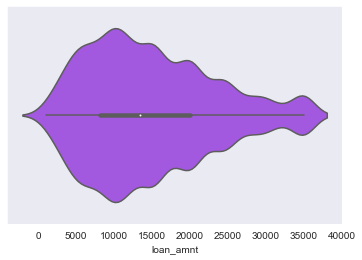

In [52]:
#lets check the distribution of loan amount
sns.violinplot(df['loan_amnt'],color='#a442f5')

<AxesSubplot:xlabel='funded_amnt'>

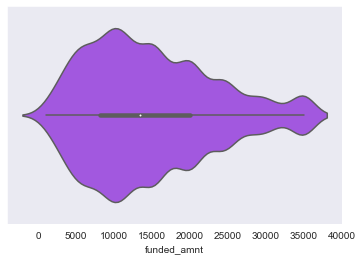

In [53]:
#lets check the distribution of funded amount
sns.violinplot(df['funded_amnt'],color='#a442f5')

# <font color =red>Above violin plots shows that the average value of loan is 15000</font>

In [54]:
categorical_cols=[cname for cname in df.columns if df[cname].dtype == "O"]

In [55]:
df[categorical_cols]

term grade sub_grade home_ownership verification_status pymnt_plan  \
0     36 months     E        E3            OWN     Source Verified          n   
1     36 months     B        B4       MORTGAGE     Source Verified          n   
2     36 months     A        A4            OWN        Not Verified          n   
3     36 months     D        D5           RENT        Not Verified          n   
4     36 months     B        B2           RENT            Verified          n   
...         ...   ...       ...            ...                 ...        ...   
4995  36 months     C        C2           RENT            Verified          n   
4996  60 months     B        B5       MORTGAGE            Verified          n   
4997  60 months     D        D3           RENT     Source Verified          n   
4998  36 months     C        C3       MORTGAGE     Source Verified          n   
4999  60 months     B        B1       MORTGAGE        Not Verified          n   

                 purpose               title zip_code addr_state  \
0     debt_consolidation  Debt consolidation    349xx         FL   
1       home_improvement    Home improvement    209xx         MD   
2     debt_consolidation  Debt consolidation    447xx         OH   
3     debt_consolidation  Debt consolidation    221xx         VA   
4            credit_card                refi    900xx         CA   
...                  ...                 ...      ...        ...   
4995               other               Other    327xx         FL   
4996    home_improvement    Home Improvement    945xx         CA   
4997  debt_consolidation  Debt consolidation    284xx         NC   
4998  debt_consolidation  Debt consolidation    362xx         AL   
4999  debt_consolidation  Debt consolidation    077xx         NJ   

     initial_list_status application_type last_week_pay  
0                      f       INDIVIDUAL     26th week  
1                      w       INDIVIDUAL      9th week  
2                      w       INDIVIDUAL      9th week  
3                      f       INDIVIDUAL    135th week  
4                      w       INDIVIDUAL     96th week  
...                  ...              ...           ...  
4995                   f       INDIVIDUAL     39th week  
4996                   f       INDIVIDUAL    222th week  
4997                   w       INDIVIDUAL     35th week  
4998                   f       INDIVIDUAL     70th week  
4999                   f       INDIVIDUAL      9th week  

[5000 rows x 13 columns]

In [56]:
for col in categorical_cols:
    print(f" Numbers of unique categories are --> {col,len(df[col].unique())}")
   

 Numbers of unique categories are --> ('term', 2)
 Numbers of unique categories are --> ('grade', 7)
 Numbers of unique categories are --> ('sub_grade', 35)
 Numbers of unique categories are --> ('home_ownership', 4)
 Numbers of unique categories are --> ('verification_status', 3)
 Numbers of unique categories are --> ('pymnt_plan', 1)
 Numbers of unique categories are --> ('purpose', 13)
 Numbers of unique categories are --> ('title', 674)
 Numbers of unique categories are --> ('zip_code', 721)
 Numbers of unique categories are --> ('addr_state', 49)
 Numbers of unique categories are --> ('initial_list_status', 2)
 Numbers of unique categories are --> ('application_type', 2)
 Numbers of unique categories are --> ('last_week_pay', 78)


# In the Next Ipynb we will do some feature selection and Feature selection and model building